<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv6-ManuelPerezOrt/blob/main/LeyendoCSVDelOpendataDelCMS_SAMPLE_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea: Selección de datos usando el archivo CVS y los conocimientos de reconstrucción**

In [39]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
import plotly.express as px

# Carga los datos
from google.colab import files
#uploaded = files.upload()
particles = pd.read_csv(('Sample6.csv'), delimiter=',')

num_rows = len(particles)
print("El numero de eventos es " + str(num_rows))

# Calcula las estadísticas descriptivas
stats_e1 = particles['E1'].describe()
stats_e2 = particles['E2'].describe()
stats_px1 = particles['px1'].describe()
stats_px2 = particles['px2'].describe()
stats_py1 = particles['py1'].describe()
stats_py2 = particles['py2'].describe()
stats_pz1 = particles['pz1'].describe()
stats_pz2 = particles['pz2'].describe()
stats_pt1 = particles['pt1'].describe()
stats_pt2 = particles['pt2'].describe()
stats_eta1 = particles['eta1'].describe()
stats_eta2 = particles['eta2'].describe()
stats_phi1 = particles['phi1'].describe()
stats_phi2 = particles['phi2'].describe()

# Crea un DataFrame para mostrar las estadísticas en una tabla
stats_table = pd.DataFrame({'px1': stats_px1, 'px2': stats_px2,
                            'E1': stats_e1, 'E2': stats_e2,
                            'py1': stats_py1, 'py2': stats_py2,
                            'pz1': stats_pz1, 'pz2': stats_pz2,
                            'pt1': stats_pt1, 'pt2': stats_pt2,
                            'eta1': stats_eta1, 'eta2': stats_eta2,
                            'phi1': stats_phi1, 'phi2': stats_phi2,})

stats_table = stats_table.round(2)
# Muestra la tabla
print(stats_table)

# Muestra las primeras 5 filas de los datos filtrados
particles.head()


El numero de eventos es 20000
            px1       px2        E1        E2       py1       py2       pz1  \
count  20000.00  20000.00  20000.00  20000.00  20000.00  20000.00  20000.00   
mean      -0.13      0.10     11.22      8.52     -0.27      0.30     -0.23   
std        4.66      4.54      7.74      6.91      4.58      4.58     11.95   
min      -47.30    -71.48      2.87      2.73    -63.91   -140.20   -222.09   
25%       -3.61     -3.41      6.66      5.17     -3.68     -3.12     -7.36   
50%       -0.26      0.24      9.06      6.58     -0.51      0.51     -0.37   
75%        3.39      3.56     13.16      9.49      3.15      3.69      7.04   
max       60.51     59.43    227.21    382.03     67.80     50.11    126.08   

            pz2       pt1       pt2      eta1      eta2      phi1      phi2  
count  20000.00  20000.00  20000.00  20000.00  20000.00  20000.00  20000.00  
mean       0.02      5.76      5.63     -0.03      0.00     -0.10      0.11  
std        8.87      3.2

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,-1,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1
1,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,-1,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1
2,165617,75167029,G,9.7583,2.3903,-3.7824,8.6715,4.4744,1.4156,-1.0072,-1,G,13.5684,-3.3975,5.1910,12.0665,6.2039,1.4187,2.1503,1
3,165617,75281957,G,9.6365,1.6516,-5.4313,7.7862,5.6769,1.1213,-1.2756,1,G,7.0263,-1.6449,4.4418,5.1887,4.7366,0.9473,1.9255,-1
4,165617,75393376,G,6.0112,3.3614,2.8883,4.0598,4.4318,0.8208,0.7098,-1,G,7.7557,-5.0416,-3.0126,5.0642,5.8731,0.7806,-2.6030,1


In [ ]:
#función para reconstruir la masa invariante de las dos partículas. Usamos la definición encontrada https://en.wikipedia.org/wiki/Invariant_mass
def minvariante(pt1,pt2,eta1,eta2,phi1,phi2):
  return np.sqrt(2*pt1*pt2*(np.cosh(eta2-eta1)-np.cos(phi1-phi2)))

#Se usan los nombres de las columnas del archivo como parámetros para usar la función que calcula la masa invariante.
minv=minvariante(particles['pt1'],particles['pt2'],particles['eta1'],particles['eta2'],particles['phi1'],particles['phi2'])

#Se crea y se grafica el histograma.
fig_5=px.histogram(minv,minv)
fig_5.update_layout(title=r"$\text{Masa invariante} \ M, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

# Calcula y muestra la media, la desviación estándar, etc. para 'minv'
mean_pt2 = minv.mean()
std_pt2 = minv.std()
min_pt2 = minv.min()
max_pt2 = minv.max()

print(f"Masa Invariente: Media = {mean_pt2}, Desviación estándar = {std_pt2}, Mínimo = {min_pt2}, Máximo = {max_pt2}")

Masa Invariente: Media = 10.208665175594492, Desviación estándar = 0.9914073784533035, Mínimo = 7.355222682632792, Máximo = 24.099924396444923


In [49]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
import plotly.express as px

# Carga los datos
from google.colab import files
#uploaded = files.upload()
particles = pd.read_csv(('Sample6.csv'), delimiter=',')


# Filtracion de los datos
filtered_particles = particles[
  (particles['pt1'] > 0) & (particles['pt1']< 8) & (particles['pt2'] > 0) & (particles['pt2']< 8)
& (particles['E1'] > 5) & (particles['E1']< 15) & (particles['E2'] > 4) & (particles['E2']< 12)
& (particles['eta1'] > -2.1) & (particles['eta1']< 2.1) & (particles['eta2'] > -2.1) & (particles['eta2']< 2.1)
& (particles['phi1'] > -3.14) & (particles['phi1']< 3.14) & (particles['phi2'] > -3.14) & (particles['phi2']< 3.14)
& (particles['Q1'] != particles['Q2']) & (particles['type1'] != 'T') & (particles['type2'] != 'T') ]

num_rows = len(filtered_particles)
print("El numero de eventos es " + str(num_rows))

# Calcula las estadísticas descriptivas
stats_e1 = filtered_particles['E1'].describe()
stats_e2 = filtered_particles['E2'].describe()
stats_px1 = filtered_particles['px1'].describe()
stats_px2 = filtered_particles['px2'].describe()
stats_py1 = filtered_particles['py1'].describe()
stats_py2 = filtered_particles['py2'].describe()
stats_pz1 = filtered_particles['pz1'].describe()
stats_pz2 = filtered_particles['pz2'].describe()
stats_pt1 = filtered_particles['pt1'].describe()
stats_pt2 = filtered_particles['pt2'].describe()
stats_eta1 = filtered_particles['eta1'].describe()
stats_eta2 = filtered_particles['eta2'].describe()
stats_phi1 = filtered_particles['phi1'].describe()
stats_phi2 = filtered_particles['phi2'].describe()

# Crea un DataFrame para mostrar las estadísticas en una tabla
stats_table = pd.DataFrame({'E1': stats_e1, 'E2': stats_e2,
                            'px1': stats_px1, 'px2': stats_px2,
                            'py1': stats_py1, 'py2': stats_py2,
                            'pz1': stats_pz1, 'pz2': stats_pz2,
                            'pt1': stats_pt1, 'pt2': stats_pt2,
                            'eta1': stats_eta1, 'eta2': stats_eta2,
                            'phi1': stats_phi1, 'phi2': stats_phi2,})

stats_table = stats_table.round(2)
# Muestra la tabla
print(stats_table)

# Muestra las primeras 5 filas de los datos filtrados
filtered_particles.head()


El numero de eventos es 12228
             E1        E2       px1       px2       py1       py2       pz1  \
count  12228.00  12228.00  12228.00  12228.00  12228.00  12228.00  12228.00   
mean       8.48      6.41     -0.12      0.09     -0.31      0.29     -0.22   
std        2.52      1.82      3.60      3.57      3.57      3.56      7.24   
min        5.00      4.00     -7.93     -7.99     -7.92     -7.98    -14.43   
25%        6.39      4.98     -3.47     -3.30     -3.62     -3.06     -6.49   
50%        7.96      5.92     -0.23      0.21     -0.53      0.50     -0.50   
75%       10.18      7.42      3.27      3.48      2.98      3.63      6.06   
max       15.00     12.00      7.86      7.85      7.81      7.98     14.44   

            pz2       pt1       pt2      eta1      eta2      phi1      phi2  
count  12228.00  12228.00  12228.00  12228.00  12228.00  12228.00  12228.00  
mean      -0.03      5.00      4.98     -0.04     -0.00     -0.12      0.09  
std        4.35      0.9

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,-1,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1
3,165617,75281957,G,9.6365,1.6516,-5.4313,7.7862,5.6769,1.1213,-1.2756,1,G,7.0263,-1.6449,4.4418,5.1887,4.7366,0.9473,1.9255,-1
4,165617,75393376,G,6.0112,3.3614,2.8883,4.0598,4.4318,0.8208,0.7098,-1,G,7.7557,-5.0416,-3.0126,5.0642,5.8731,0.7806,-2.6030,1
5,165617,74452546,G,12.0723,-3.7322,2.5104,-11.2026,4.4979,-1.6437,2.5495,-1,G,10.4401,3.3546,-3.4202,-9.2754,4.7908,-1.4147,-0.7951,1
6,165617,74496866,G,6.2237,-0.5092,4.2098,-4.5542,4.2405,-0.9327,1.6912,-1,G,5.7566,-0.5308,-5.4727,1.7016,5.4984,0.3047,-1.6675,1


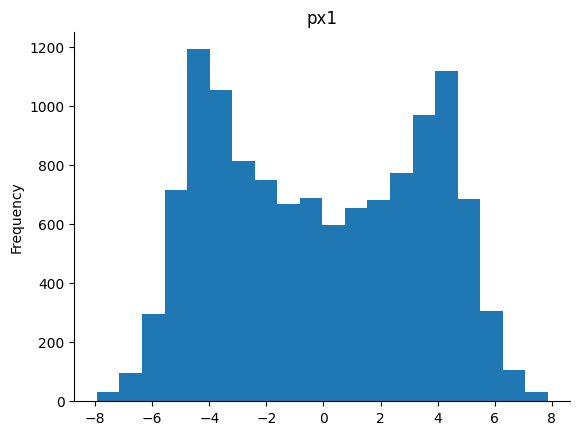

In [50]:
# @title px1

from matplotlib import pyplot as plt
filtered_particles['px1'].plot(kind='hist', bins=20, title='px1')
plt.gca().spines[['top', 'right',]].set_visible(False)

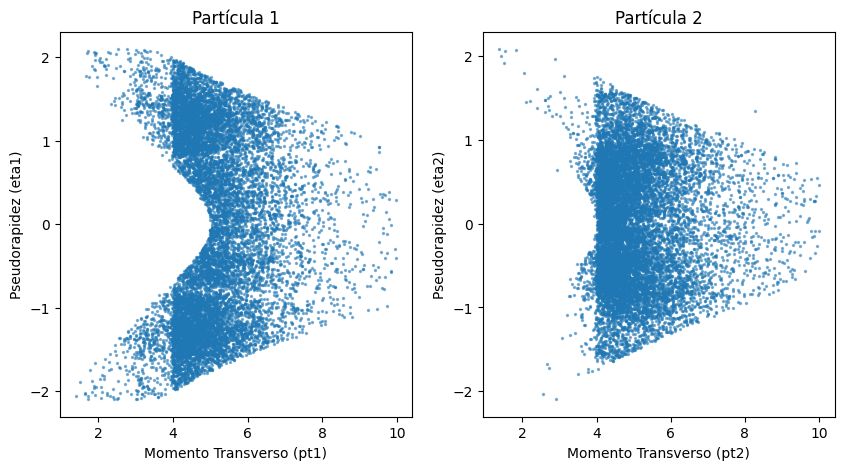

In [41]:
# @title pt1 vs eta1

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.scatter(filtered_particles['pt1'], filtered_particles['eta1'], s=2, alpha=0.5)
plt.xlabel('Momento Transverso (pt1)')
plt.ylabel('Pseudorapidez (eta1)')
plt.title('Partícula 1')

plt.subplot(1, 2, 2)
plt.scatter(filtered_particles['pt2'], filtered_particles['eta2'], s=2, alpha=0.5)
plt.xlabel('Momento Transverso (pt2)')
plt.ylabel('Pseudorapidez (eta2)')
_ = plt.title('Partícula 2')

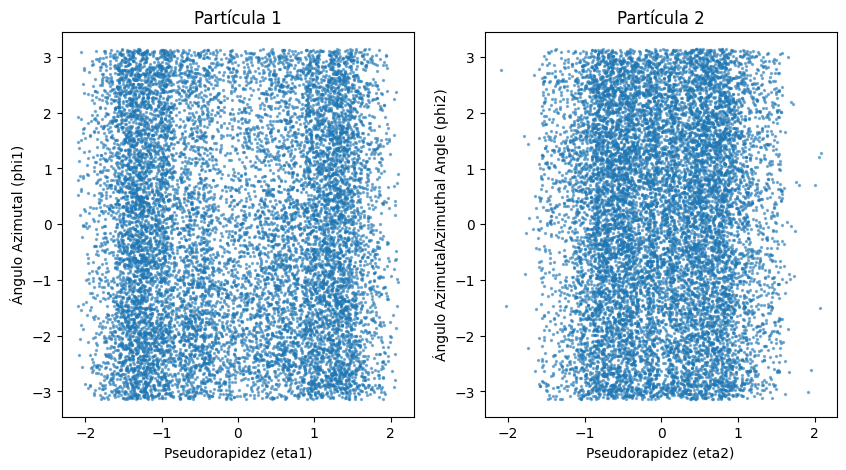

In [42]:
# @title Pseudorapidity vs Azimuthal Angle

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(filtered_particles['eta1'], filtered_particles['phi1'], s=2, alpha=0.5)
plt.xlabel('Pseudorapidez (eta1)')
plt.ylabel('Ángulo Azimutal (phi1)')
plt.title('Partícula 1')

plt.subplot(1, 2, 2)
plt.scatter(filtered_particles['eta2'], filtered_particles['phi2'], s=2, alpha=0.5)
plt.xlabel('Pseudorapidez (eta2)')
plt.ylabel('Ángulo AzimutalAzimuthal Angle (phi2)')
_ = plt.title('Partícula 2')

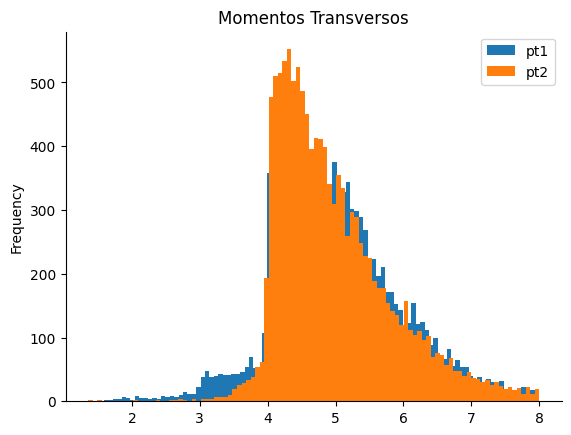

In [51]:
from matplotlib import pyplot as plt

filtered_particles['pt1'].plot(kind='hist', bins=100, label='pt1')
filtered_particles['pt2'].plot(kind='hist', bins=100, label='pt2', title='Momentos Transversos')

plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend()
plt.show()


In [53]:
#función para reconstruir la masa invariante de las dos partículas. Usamos la definición encontrada https://en.wikipedia.org/wiki/Invariant_mass
def minvariante(pt1,pt2,eta1,eta2,phi1,phi2):
  return np.sqrt(2*pt1*pt2*(np.cosh(eta2-eta1)-np.cos(phi1-phi2)))

#Se usan los nombres de las columnas del archivo como parámetros para usar la función que calcula la masa invariante.
minv=minvariante(filtered_particles['pt1'],filtered_particles['pt2'],filtered_particles['eta1'],filtered_particles['eta2'],filtered_particles['phi1'],filtered_particles['phi2'])

#Se crea y se grafica el histograma.
fig_5=px.histogram(minv,minv)
fig_5.update_layout(title=r"$\text{Masa invariante} \ M, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

# Calcula y muestra la media, la desviación estándar, etc. para 'minv'
mean_pt2 = minv.mean()
std_pt2 = minv.std()
min_pt2 = minv.min()
max_pt2 = minv.max()

print(f"Masa Invariente: Media = {mean_pt2}, Desviación estándar = {std_pt2}, Mínimo = {min_pt2}, Máximo = {max_pt2}")

Masa Invariente: Media = 10.30388047722518, Desviación estándar = 0.9636383145376853, Mínimo = 7.971927547190357, Máximo = 13.700607833370766
